In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from numpy.linalg import eig, det, solve
from math import sqrt, pow, exp

In [2]:
def gamma(j):
    return 1.0 / sqrt(4 - (j+1)**-2.0)

def A_n(n):
    A = np.zeros((n,n), dtype=np.float64)

    # fill secondary diagonals;
    for i in range(n-1):
        g = gamma(i)
        A[i][i+1] = g
        A[i+1][i] = g
    return A

def L_n(x, n):
    A = A_n(n)
    I = np.identity(n)
    return det(x*I-A)

Verify the formulas by plotting Legendre polynomials $L_n(x)$ and $L_n(x) / L_n(1)$

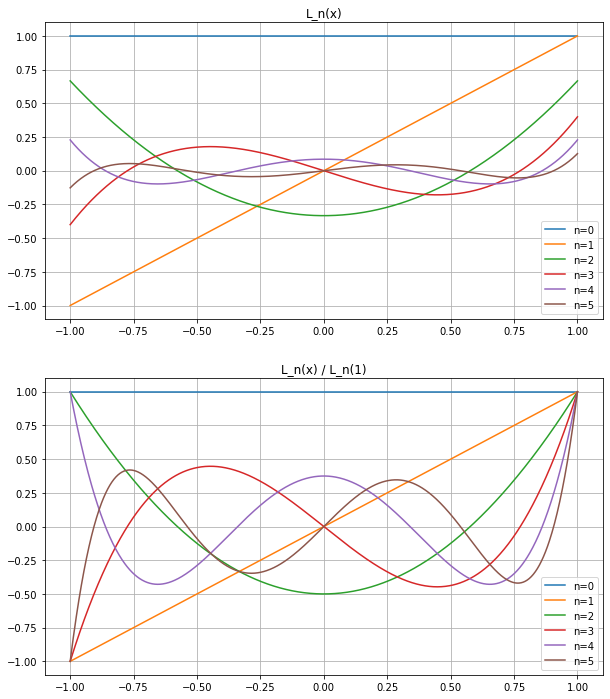

In [3]:
point_cnt = 1000
x_vals = np.linspace(-1,1, point_cnt)
n_max = 6

plt.figure(figsize=(10,12))
plt.subplot(211)
for n in range(n_max): plt.plot(x_vals, [L_n(x,n) for x in x_vals], label="n="+str(n))    
plt.title("L_n(x)")
plt.legend()
plt.grid()

plt.subplot(212)
for n in range(n_max): plt.plot(x_vals, [L_n(x,n) / L_n(1,n) for x in x_vals], label="n="+str(n))    
plt.title("L_n(x) / L_n(1)")
plt.legend()
plt.grid()

Find roots of $L_n$ by computing the eigenvalues of $A_n$

These roots will be our knots $x_i$

In [4]:
def roots_of_Ln(n):
    return np.array(pd.DataFrame(eig(A_n(n))).iloc[0].tolist()) # numpy returns eigenvalues in a really strange way. this is necessary so we only get unique

print("roots n=4: ", roots_of_Ln(4))

roots n=4:  [-0.86113631 -0.33998104  0.86113631  0.33998104]


Our LSE looks as follows:

$
w_1 x_1^1 + w_2 x_2^1 + \cdots + w_n x_n^1= I(1) \\
w_1 x_1^2 + w_2 x_2^2 + \cdots + w_n x_n^2= I(2) \\
\vdots \\
w_1 x_1^n + w_2 x_2^n + \cdots + w_n x_n^n= I(n) \\
\implies X w = I
$

With
$I(n) = \int_{-1}^{1} x^n \,dx$

In [5]:
# returns the integral from -1 to 1 of x^n dx
def integral_xn(n):
    if (n % 2):  return 0  # odd functions are always zero over a symmeytric inteval
    else: return 2.0 / (n+1)
    
def weights(roots):
    n = len(roots)
    X = np.asmatrix([np.power(roots, i) for i in range(1, n+1)])
    I = [integral_xn(i) for i in range(1, n+1)]
    return solve(X, I)
print("weights for n=4: ", weights(roots_of_Ln(4)))

weights for n=4:  [0.34785485 0.65214515 0.34785485 0.65214515]


In [6]:
# Functions to Integrate
def f1(x): return exp(x)
def f2(x): return sqrt(x)

# Analtitic results for functions to integrate
def I_f1_analytic(a, b): return exp(b) - exp(a)
def I_f2_analytic(a, b): return 2.0 / 3.0 * (b**(3/2) - a**(3/2))

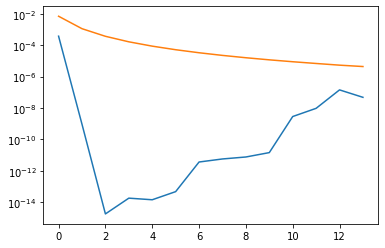

In [17]:
def gaussQuadrature_integral(f, a, b, n):
    roots = roots_of_Ln(n)
    w = weights(roots)    
    
    return sum([w[i]*f(((b-a)*roots[i] + b +a) / 2.0)*(b-a)/2.0 for i in range(n)])

def study_convergence(f, f_analytic):
    a, b = 0, 1
    err = [abs(gaussQuadrature_integral(f, a, b, n) - f_analytic(a, b)) for n in range(2,15,2)]
    plt.yscale("log")
    plt.plot(err)

study_convergence(f1, I_f1_analytic)
study_convergence(f2, I_f2_analytic)

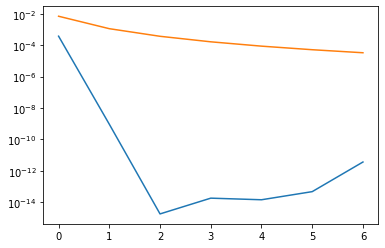

In [24]:
def gaussQuadrature_integral(f, a, b, n):
    roots = roots_of_Ln(n)
    w = weights(roots)    
    
    return sum([w[i]*f(((b-a)*roots[i] + b +a) / 2.0)*(b-a)/2.0 for i in range(n)])

def integrate_withSubintervals(f, a, b, n, m):
    x = np.linspace(a,b,m+1) # create m subintervals
    return sum( [gaussQuadrature_integral(f, x[i], x[i+1],n) for i in range(len(x)-1)] )



def study_convergence(f, f_analytic, m):
    a, b = 0, 1
    err = [abs(integrate_withSubintervals(f, a, b, n, m) - f_analytic(a, b)) for n in range(2,15,2)]
    plt.yscale("log")
    plt.plot(err)

m = 1
study_convergence(f1, I_f1_analytic, m)
study_convergence(f2, I_f2_analytic, m)